In [1]:
%run nbinit.ipy

... Configuring matplotlib formats
... Configuring matplotlib with inline figures
... Importing numpy as np, scipy as sp, pyplot as plt, scipy.stats as stats
   ... scipy.signal as sig
... Importing widgets, display, HTML, Image, Javascript
... Some LaTeX definitions


... Defining figures captions 


... Loading customized Javascript for interactive solutions (show/hide)
... Redefining interactive from ipywidgets
... Redefining capture for ipywidgets < 7


\index{Convolution}
\index{Convolution|fin}

# Filters and convolution

## Representation formula

\index{Filtres}
\index{Filtres|fin}
\index{Filtres!Définition|fin}

Any signal $x(n)$ can be written as follows:
$$
\eqboxc{x(n) = \sum_{m=-\infty}^{+\infty} x(m)\delta(n-m).} 
$$
It is very important to understand the meaning of this formula. 

 -  Since $\delta(n-m)=1$ if and only if $n=m$, then all the terms in the sum cancel, excepted the one with  $n=m$ and therefore we arrive at the identity $x(n)=x(n)$.
 -  The set of delayed Dirac impulses $\delta(n-m)$ form a basis of the space of discrete signals. Then the coordinate of a signal on this basis is the scalar product $\sum_{n=-\infty}^{+\infty} x(n)\delta(n-m)=x(m)$. Hence, the reprentation formula just expresses the decomposition of the signal on the basis, where the $x(m)$ are the coordinates. 
 
This means that $x(n)$, as a waveform, is actually composed of the sum of many Dirac impulses, placed at each integer, with a weight $x(m)$ which is nothing but the amplitude of the signal at time $m=n$. The formula shows how the signal can be seen as the superposition of Dirac impulses with the correct weights. Lets us illustrate this with a simple Python demonstration:

x= [0. 1. 2. 3. 0. 0. 1. 2. 3. 0.]


Text(0.5,0.98,'Decomposition of a signal into a sum of Dirac')

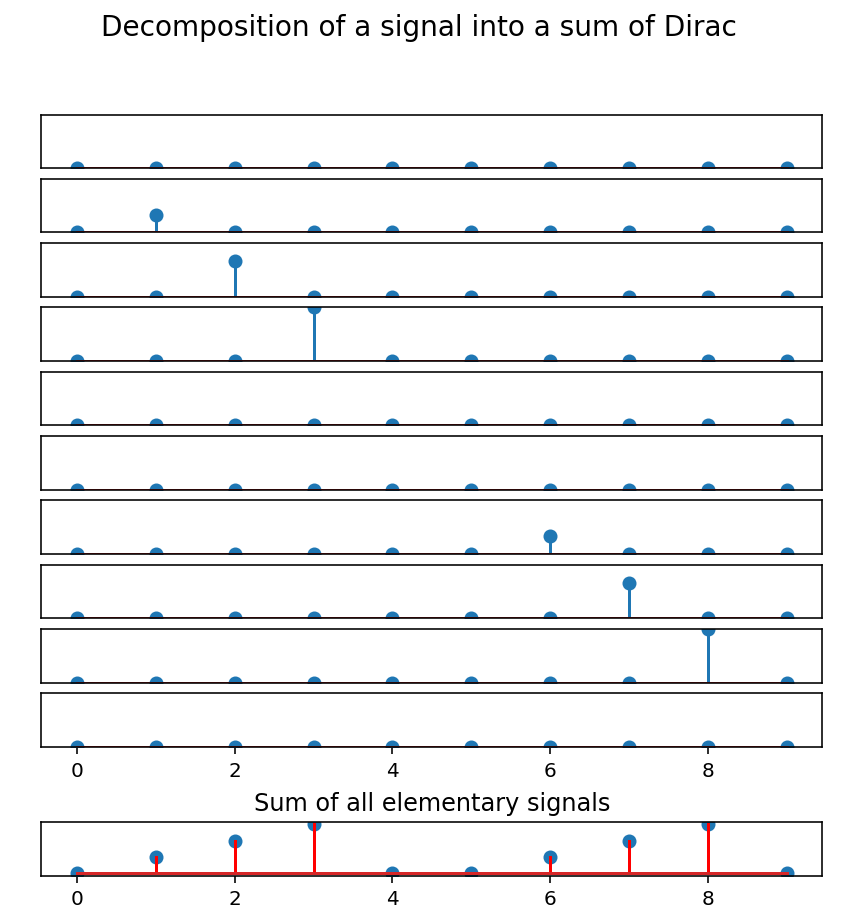

In [5]:
L = 10
z = np.zeros(L)
x = np.zeros(L)
x[5:9] = range(4)
x[0:4] = range(4)
print("x=", x)
s = np.zeros((L, L))
for k in range(L):
    s[k][k] = x[k]
# this is equivalent as s=np.diag(x)        
f, ax = plt.subplots(L + 2, figsize=(7, 7))
for k in range(L):
    ax[k].stem(s[k][:])
    ax[k].set_ylim([0, 3])
    ax[k].get_yaxis().set_ticks([])
    if k != L - 1: ax[k].get_xaxis().set_ticks([])

ax[L].axis('off')

ax[L + 1].get_yaxis().set_ticks([])
ax[L + 1].stem(x, linefmt='r')
ax[L + 1].set_title("Sum of all elementary signals")
#f.tight_layout()
f.suptitle("Decomposition of a signal into a sum of Dirac", fontsize=14)

## The convolution operation

### Definition

Using previous elements, we are now in position of characterizing more precisely the 
\textit{filters}. As already mentioned, a filter is a linear and time-invariant system, see [Intro_Filtering](Intro_Filtering.ipynb#filters).  


The system being time invariant, the output associated with 
$x(m)\delta(n-\tau)$ is $x(m)h(n-m)$, if $h$ is the impulse response. 
$$
x(m)\delta(n-m) \rightarrow x(m)h(n-m).
$$
Since we know that any signal $x(n)$ can be written as (representation formula)
$$
x(n) = \sum_{m=-\infty}^{+\infty} x(m)\delta(n-m), 
$$
we obtain, by linearity --that is superposition of all outputs, that 
$$
\boxed{\displaystyle{y(n) = \sum_{m=-\infty}^{+\infty} x(m)h(n-m) = 
[x*h](n).}} 
$$
\index{Convolution!Définition|fin}

This relation is called \textit{convolution} of $x$ and $h$, and this operation is denoted
$[x*h](t)$, so as to indicate that the  \textit{result} of the convolution operation is evaluated 
at time $n$ and that the variable $m$ is simply a dummy variable that disappears by the summation.

\begin{textboxa}
The convolution operation is important since it enables to compute the output of the system using only its impulse response. It is not necessary to know the way the system is build, its internal design and so on. The only thing one must have is its impulse response. Thus we see that the knowledge of the impulse response enable to fully characterize the input-output relationships.\end{textboxa}

### Illustration

We show numerically that the output of a system is effectively the weightened sum of delayed impulse responses. This indicates that the output of the system can be computed either by using its difference equation, or by the convolution of its input with its impulse response. 

Direct response

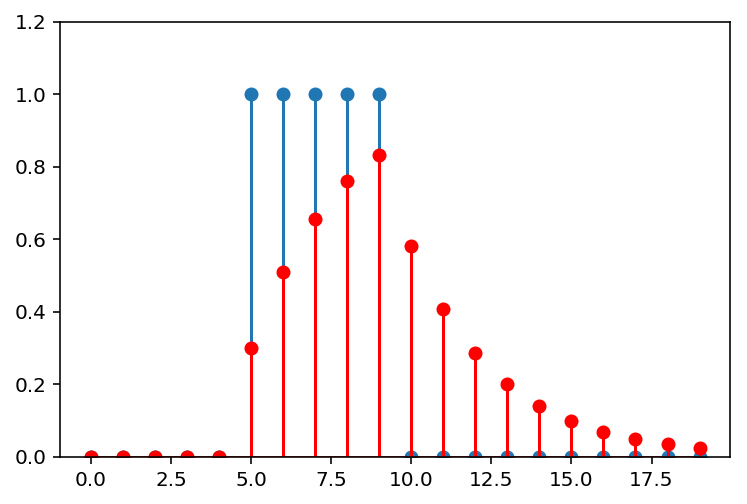

In [6]:
def op3(signal):
    transformed_signal=np.zeros(np.size(signal))
    for t in np.arange(np.size(signal)):
        transformed_signal[t]= 0.7*transformed_signal[t-1]+0.3*signal[t]
    return transformed_signal
#
# rectangular pulse
N=20; L=5; M=10
r=np.zeros(N)
r[L:M]=1
#
plt.stem(r)
plt.stem(op3(r),linefmt='r-',markerfmt='ro')
_=plt.ylim([0, 1.2])

Response by the sum of delayed impulse responses

Text(0.5,0.98,'Convolution as the sum of all delayed impulse responses')

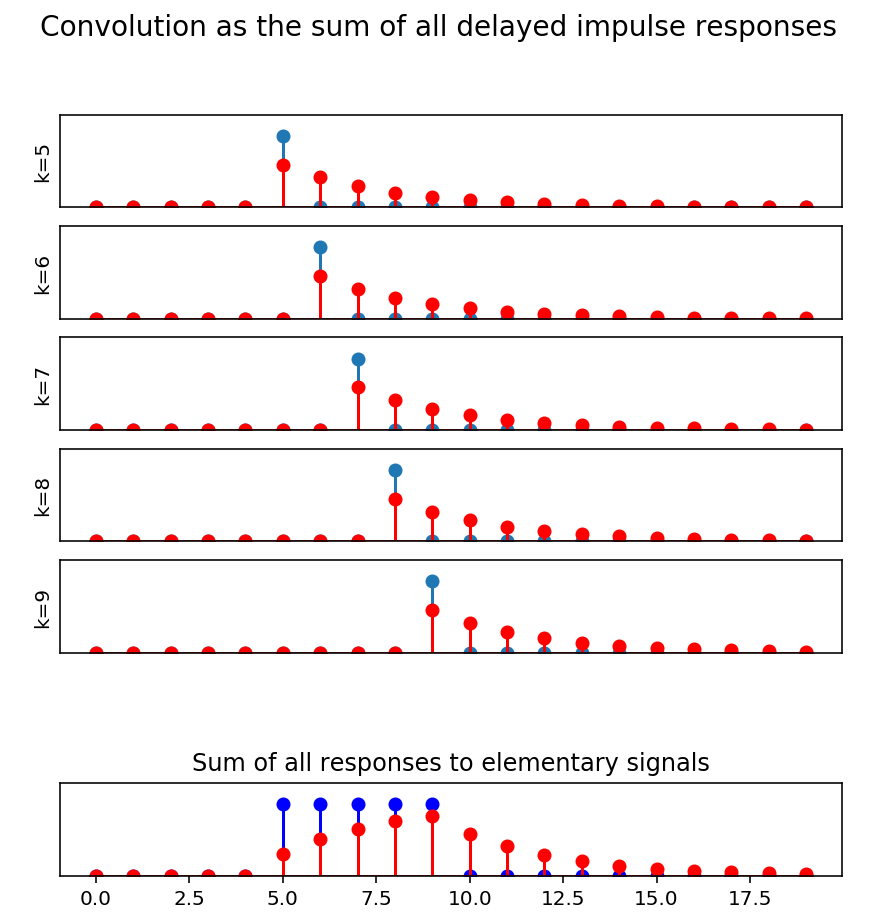

In [7]:
s = np.zeros((N, N))
for k in range(N):
    s[k][k] = r[k]
# this is equivalent to s=np.diag(x)        
ll = range(5, 10)
llmax = ll[-1]
f, ax = plt.subplots(len(ll) + 2, figsize=(7, 7))
u = 0
sum_of_responses = np.zeros(N)
for k in ll:
    ax[u].stem(s[k][:])
    ax[u].stem(2 * op3(s[k][:]), linefmt='r-', markerfmt='ro')
    ax[u].set_ylim([0, 1.3])
    ax[u].set_ylabel('k={}'.format(k))
    ax[u].get_yaxis().set_ticks([])
    sum_of_responses += op3(s[k][:])
    if u != llmax - 1: ax[u].get_xaxis().set_ticks([])
    u += 1

ax[u].axis('off')

ax[u + 1].get_yaxis().set_ticks([])
ax[u + 1].stem(r, linefmt='b-', markerfmt='bo')
ax[u + 1].stem(sum_of_responses, linefmt='r-', markerfmt='ro')
ax[u + 1].set_ylim([0, 1.3])
ax[u + 1].set_title("Sum of all responses to elementary signals")

#
#f.tight_layout()
f.suptitle(
    "Convolution as the sum of all delayed impulse responses", fontsize=14)

### Exercises

\begin{exercise}\label{exo:convolution}
\begin{enumerate}
\item  Compute *by hand* the convolution between two rectangular signals,
\item propose a python program that computes the result, given two arrays. Syntax:
```
    def myconv(x,y):
        return z
```
\item Of course, convolution functions have already be implemented, in many languages, by many people and using many algorithms. Implementations also exist in two or more dimensions. So, we do need to reinvent the wheel. Consult the help of `np.convolve` and of `sig.convolve` (respectively from numpy and scipy modules). 
\item use this convolution to compute and display the convolution between two rectangular signals
 \end{enumerate}
\end{exercise}

In [8]:
def myconv(x, y):
    L = np.size(x)
    # we do it in the simple case where both signals have the same length
    assert np.size(x) == np.size(
        y), "The two signals must have the same lengths"
    # as an exercise, you can generalize this

    z = np.zeros(2 * L - 1)
    #
    ## -> FILL IN   
    #
    return z


# test it:
z = myconv(np.ones(L), np.ones(L))
print('z=', z)

z= [0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
def myconv(x, y):
    L = np.size(x)
    # we do it in the simpla case where both signals have the same length
    assert np.size(x) == np.size(
        y), "The two signals must have the same lengths"
    # as an exercise, you can generalize this

    z = np.zeros(2 * L - 1)
    # delay<L
    for delay in np.arange(0, L):
        z[delay] = np.sum(x[0:delay + 1] * y[-1:-1 - delay - 1:-1])
    # delay>=L
    for delay in np.arange(L, 2 * L - 1):
        z[delay] = np.sum(x[delay + 1 - L:L] * y[-delay - 1 + L:0:-1])
    return z


# test it:
z = myconv(np.ones(L), np.ones(L))
print('z=', z)

z= [1. 2. 3. 4. 5. 4. 3. 2. 1.]


Convolution with legacy convolve:

Text(0.5,0,'Delay')

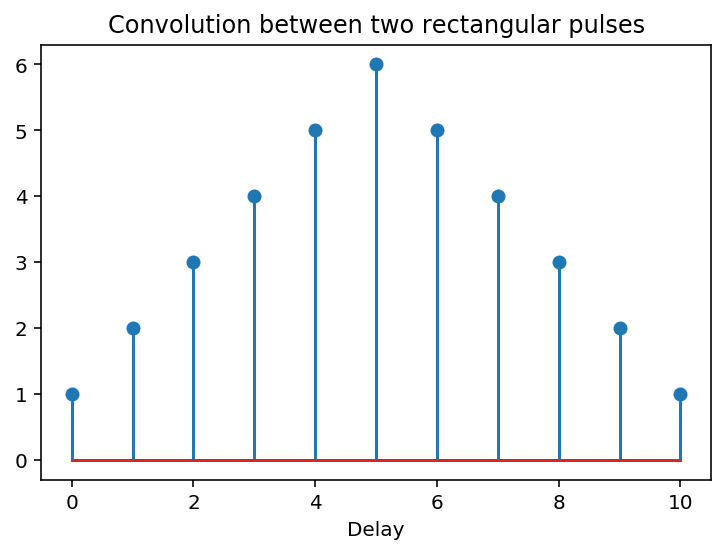

In [10]:
#help(np.convolve)
# convolution between two squares of length L
L = 6
z = sig.convolve(np.ones(L), np.ones(L))
plt.stem(z)
plt.title("Convolution between two rectangular pulses")
plt.xlabel("Delay")


----
<div align=right> [Index](toc.ipynb) - [Back](Fourier_transform_properties.ipynb) - [Next](TransferFunctions.ipynb)</div>